In [1]:
%matplotlib inline

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris, make_circles

from sklearn.svm import LinearSVC, LinearSVR, SVC

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Support Vector Machines

In [3]:
iris_data = load_iris()

In [4]:
iris_attributes, iris_target = iris_data['data'], iris_data['target']

In [7]:
iris_attributes[:5], iris_target[:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]))

<b>SVM classifier</b>

In [16]:
simple_svm = LinearSVC(loss = 'hinge', max_iter = 10000)

In [17]:
simple_svm.fit(iris_attributes, iris_target)

C:\Users\diton\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(loss='hinge', max_iter=10000)

In [18]:
simple_svm.coef_

array([[ 0.30941435,  0.42976759, -1.04547042, -0.61783616],
       [ 0.60997129, -1.69784951,  0.45770678, -1.62327517],
       [-1.11570087, -1.26836914,  1.70972419,  2.43547654]])

It is a linear function. 

*Verticle line is not a function.

In [19]:
simple_svm.predict(iris_attributes)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
simple_svm.score(iris_attributes, iris_target)

0.94

## Setting C 

Strong regularization

In [25]:
simple_svm_penalty = LinearSVC(C = 1e-5)

In [26]:
simple_svm_penalty.fit(iris_attributes, iris_target)

LinearSVC(C=1e-05)

In [27]:
simple_svm_penalty.coef_

array([[-0.00618899, -0.00165231, -0.00742254, -0.00280001],
       [-0.00480169, -0.00319491, -0.00217729, -0.00075817],
       [-0.00380865, -0.00294014,  0.00018464,  0.00056783]])

In [28]:
simple_svm_penalty.score(iris_attributes, iris_target)

0.3333333333333333

The model above doesn't care about the data.

Weak regularization

In [21]:
simple_svm_penalty = LinearSVC(C = 1e-2)

In [22]:
simple_svm_penalty.fit(iris_attributes, iris_target)

LinearSVC(C=0.01)

In [23]:
simple_svm_penalty.coef_

array([[ 0.07905575,  0.28624194, -0.43700036, -0.19187972],
       [ 0.01499289, -0.25530531,  0.11715578, -0.10162956],
       [-0.24018788, -0.18099479,  0.34400786,  0.30562128]])

In [24]:
simple_svm_penalty.score(iris_attributes, iris_target)

0.8133333333333334

<b>Logistic Regression model</b>

In [33]:
log_reg_model = LogisticRegression(C = 1e-2)

In [34]:
log_reg_model.fit(iris_attributes, iris_target)

LogisticRegression(C=0.01)

In [35]:
log_reg_model.coef_

array([[-0.13677373,  0.09609099, -0.43483295, -0.17832754],
       [-0.00099515, -0.10240436,  0.08668986, -0.00339625],
       [ 0.13776888,  0.00631337,  0.34814309,  0.18172379]])

In [36]:
log_reg_model.score(iris_attributes, iris_target)

0.8733333333333333

the algorithms we learn == the classes we have

First line -> is this class 0 -> Yes, No -> is this class 1 -> Yes, NO, etc

<b>SVM models</b> -> High complexity O(m * n^2) to O(m * n^3) m - number of features, n - number of samples; Feasable for max 10^5 samples; Very slow on big datasets.

## SVM Regressor

In [59]:
svr_model = LinearSVR(C = 1e-3)

In [65]:
first_attribute = iris_attributes[:, 0].reshape(-1, 1)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(first_attribute, iris_target, test_size = 0.2, random_state = 42)

In [69]:
svr_model.fit(X_train, y_train)

LinearSVR(C=0.001)

In [70]:
svr_model.coef_

array([0.15578521])

In [71]:
svr_model.predict(X_test)

array([0.96884296, 0.90652888, 1.21809929, 0.95326444, 1.0778926 ,
       0.85979332, 0.89095036, 1.09347112, 0.98442148, 0.9221074 ,
       1.03115704, 0.76632219, 0.87537184, 0.78190071, 0.81305775,
       1.        , 1.03115704, 0.89095036, 0.90652888, 1.01557852,
       0.75074367, 0.96884296, 0.79747923, 1.01557852, 1.24925633,
       1.06231408, 1.06231408, 1.0778926 , 0.76632219, 0.76632219])

In [78]:
y_pred = svr_model.predict(X_test)

In [81]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [82]:
mae, mse, r2

(0.6273002375686082, 0.5364492771288176, 0.23242551762172348)

<b>Using PolynomialFeatures</b>

In [95]:
simple_svm = LinearSVC()

In [111]:
simple_svm = LinearSVC(C = 1e-3) # C = 1e-3 for stronger regularization; a simpler model

In [97]:
simple_svm.fit(iris_attributes, iris_target)

LinearSVC(C=0.001)

In [98]:
simple_svm.coef_

array([[ 0.01439214,  0.10002878, -0.18606391, -0.08267647],
       [-0.03771444, -0.07470797,  0.03917557,  0.00300156],
       [-0.07744732, -0.09388809,  0.11991599,  0.07658253]])

In [101]:
simple_svm.predict(iris_attributes) # one of the classes is omitted entirely

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [102]:
simple_svm.score(iris_attributes, iris_target)

0.6666666666666666

<b>poly</b>

In [104]:
poly_attributes = PolynomialFeatures(degree = 3).fit_transform(iris_attributes)

In [106]:
poly_svc = LinearSVC(C = 1e-3)

In [107]:
poly_svc.fit(poly_attributes, iris_target)

LinearSVC(C=0.001)

In [108]:
poly_svc.score(poly_attributes, iris_target)

0.98

More features lead to a better-learned model.

In [110]:
poly_svc.predict(poly_attributes)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We have a simpler model with more complex features.

Cover's theorem -> for high-dimensional data we can use a simplier algorithm

In [115]:
iris_attributes.shape, poly_attributes.shape

((150, 4), (150, 35))

<b>The dimensionality can be increased automatically.</b>

More dimensions -> a slower algorithm.

<b>Kernal function</b> -> a scalar product in many dimensions

In [134]:
circles_attr, circles_tagret = make_circles(noise = 0.08, factor = 0.4, n_samples = 200)

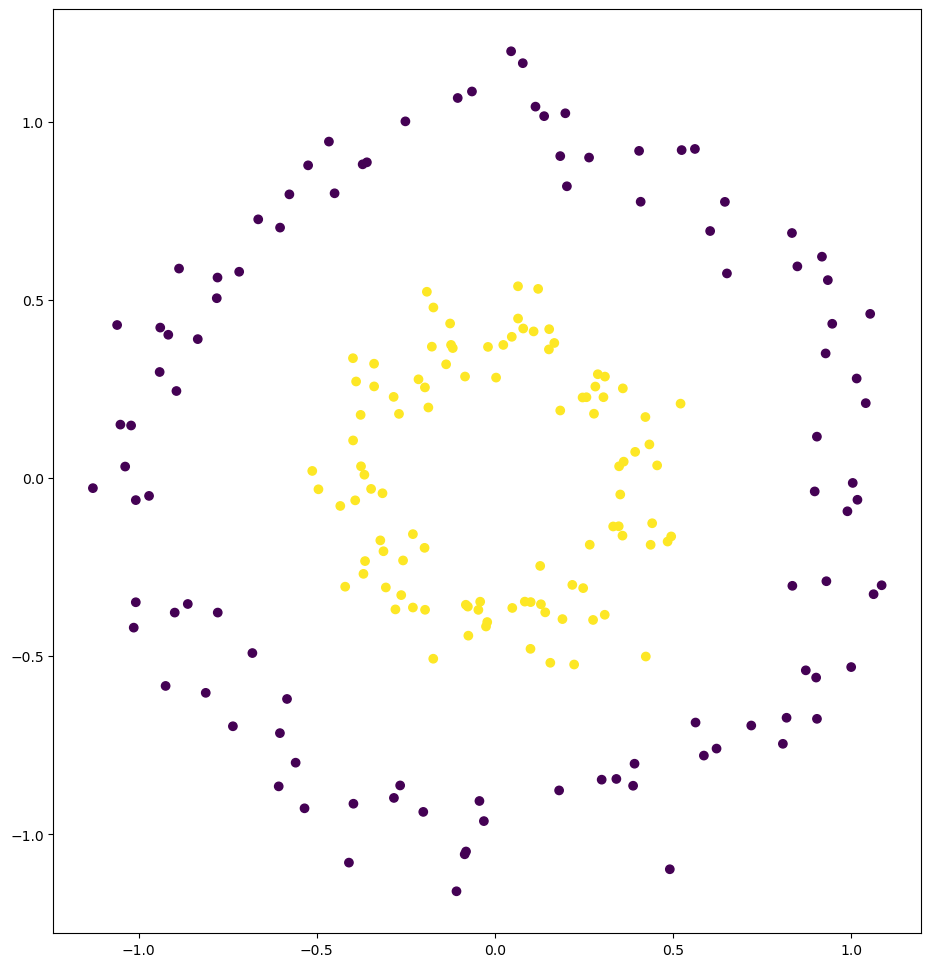

In [135]:
plt.figure(figsize = (16, 12))
plt.scatter(circles_attr[:, 0], circles_attr[:, 1], c = circles_tagret)
plt.gca().set_aspect('equal')

In [136]:
circles_scm = LinearSVC()

In [137]:
circles_scm.fit(circles_attr, circles_tagret)

LinearSVC()

In [138]:
circles_scm.score(circles_attr, circles_tagret)

0.5

The linear model does not work here.

In [140]:
PolynomialFeatures(degree = 2).fit_transform(circles_attr)

array([[ 1.        , -0.89844931, -0.37756025,  0.80721115,  0.33921874,
         0.14255174],
       [ 1.        , -0.17285331, -0.50708663,  0.02987827,  0.0876516 ,
         0.25713685],
       [ 1.        ,  0.29981839, -0.84651121,  0.08989107, -0.25379963,
         0.71658122],
       ...,
       [ 1.        ,  0.30841777, -0.38367359,  0.09512152, -0.11833175,
         0.14720542],
       [ 1.        , -0.08364931,  0.28493931,  0.00699721, -0.02383498,
         0.08119041],
       [ 1.        ,  0.48489777, -0.1781723 ,  0.23512584, -0.08639535,
         0.03174537]])

In [142]:
circles_attr_poly = PolynomialFeatures(degree = 2).fit_transform(circles_attr)

In [143]:
circles_scm.fit(circles_attr_poly, circles_tagret)

LinearSVC()

In [144]:
circles_scm.score(circles_attr_poly, circles_tagret)

1.0

In [145]:
circles_attr_poly.shape

(200, 6)

In [148]:
PolynomialFeatures(degree = 2).fit(circles_attr).get_feature_names_out()

array(['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

This makes a projection from 2D to 3D.